In [91]:
from scipy.stats import wasserstein_distance
from utils import Array
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import ast

In [92]:
df  = pd.read_csv('DataBase.csv')
df.head()

,device,kernel
0,"{'time': 416.47, 's2': {'ax': -0.06943185, 'ay...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
1,"{'time': 416.47, 's2': {'ax': -0.06943185, 'ay...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
2,"{'time': 416.49, 's2': {'ax': -0.05985504, 'ay...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
3,"{'time': 416.51, 's2': {'ax': -0.1077391, 'ay'...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
4,"{'time': 416.51, 's2': {'ax': -0.1077391, 'ay'...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."


# TRATAMENTO DE DADOS

In [93]:
df = df.head(20000).copy()

In [94]:
device = df.device.apply(ast.literal_eval).apply(pd.Series)
device

,time,s2,s1
0,416.470,"{'ax': -0.06943185, 'ay': -2.954445, 'wz': -0....","{'ax': -0.01197101, 'ay': -2.920926, 'wz': -0...."
1,416.470,"{'ax': -0.06943185, 'ay': -2.954445, 'wz': -0....","{'ax': -0.01197101, 'ay': -2.920926, 'wz': -0...."
2,416.490,"{'ax': -0.05985504, 'ay': -2.762909, 'wz': -0....","{'ax': -0.03591302, 'ay': -2.913743, 'wz': -0...."
3,416.510,"{'ax': -0.1077391, 'ay': -2.961627, 'wz': -0.0...","{'ax': -0.02154782, 'ay': -2.942474, 'wz': -0...."
4,416.510,"{'ax': -0.1077391, 'ay': -2.961627, 'wz': -0.0...","{'ax': -0.02154782, 'ay': -2.942474, 'wz': -0...."
...,...,...,...
19995,666.037,"{'ax': 11.86806, 'ay': -1.692701, 'wz': 0.2458...","{'ax': 11.94946, 'ay': -1.78368, 'wz': 0.27272..."
19996,666.057,"{'ax': 9.337387, 'ay': -1.142034, 'wz': 0.1869...","{'ax': 9.797073, 'ay': -0.01675941, 'wz': 0.27..."
19997,666.077,"{'ax': 11.79384, 'ay': -1.247379, 'wz': -0.005...","{'ax': 11.79384, 'ay': -1.247379, 'wz': -0.003..."
19998,666.077,"{'ax': 11.79384, 'ay': -1.247379, 'wz': -0.005...","{'ax': 11.79384, 'ay': -1.247379, 'wz': -0.003..."


In [95]:
kernel = df.kernel.apply(ast.literal_eval).apply(pd.Series)
kernel

,pitch,roll,yaw,wx,wy,wz,ax,ay,az
0,0.00,0.00,0.00,5.0,2.0,-1.0,-91.0,123.0,474.0
1,0.00,0.00,0.00,5.0,2.0,-1.0,-91.0,123.0,474.0
2,0.00,0.00,0.00,5.0,2.0,-1.0,-91.0,123.0,474.0
3,0.00,0.00,0.00,5.0,2.0,-1.0,-91.0,123.0,474.0
4,0.00,0.00,0.00,5.0,2.0,-1.0,-91.0,123.0,474.0
...,...,...,...,...,...,...,...,...,...
19995,10.61,-81.78,352.68,43.0,326.0,-55.0,491.0,91.0,36.0
19996,10.81,-80.60,352.75,-151.0,1356.0,-223.0,473.0,97.0,139.0
19997,10.81,-80.60,352.75,-151.0,1356.0,-223.0,473.0,97.0,139.0
19998,10.81,-80.60,352.75,-151.0,1356.0,-223.0,473.0,97.0,139.0


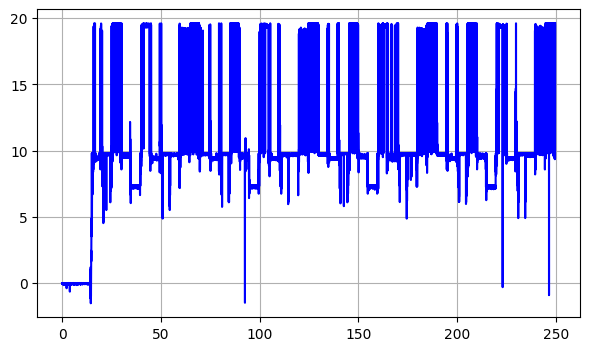

In [96]:
device['time'] = device.time - device.time.values[0]

plt.figure(figsize=(7, 4))
plt.plot(device.time, [data['ax'] for data in device['s1']], color='blue')
plt.grid()

In [97]:
print(float(np.round(device.time.diff().median(), 3)))
dt = 0.020

0.02


# LIMITES

In [98]:
SAMPLE_RANGE = (10, 60)
kernel['time'] = device.time

device = device.copy().loc[(device.time >= SAMPLE_RANGE[0]) & (device.time <= SAMPLE_RANGE[1])]
kernel = kernel.copy().loc[(kernel.time >= SAMPLE_RANGE[0]) & (kernel.time <= SAMPLE_RANGE[1])]

device['time'] = device.time - device.time.values[0]
kernel['time'] = kernel.time - kernel.time.values[0]

In [99]:
device.head()

,time,s2,s1
802,0.00,"{'ax': -0.002394202, 'ay': -3.04303, 'wz': -0....","{'ax': -0.002394202, 'ay': -3.04303, 'wz': -0...."
803,0.00,"{'ax': -0.002394202, 'ay': -3.04303, 'wz': -0....","{'ax': -0.002394202, 'ay': -3.04303, 'wz': -0...."
804,0.02,"{'ax': -0.07900865, 'ay': -3.028665, 'wz': -0....","{'ax': -0.07900865, 'ay': -3.028665, 'wz': -0...."
805,0.04,"{'ax': -0.08140286, 'ay': -2.949656, 'wz': -0....","{'ax': -0.07900865, 'ay': -2.990358, 'wz': -0...."
806,0.06,"{'ax': -0.002394202, 'ay': -3.002329, 'wz': -0...","{'ax': -0.02394202, 'ay': -3.021482, 'wz': -0...."


In [100]:
kernel.head()

,pitch,roll,yaw,wx,wy,wz,ax,ay,az,time
802,14.86,11.16,359.99,-3.0,-3.0,0.0,-93.0,130.0,473.0,0.00
803,14.86,11.16,359.99,-3.0,-3.0,0.0,-93.0,130.0,473.0,0.00
804,14.86,11.16,359.99,1.0,1.0,0.0,-93.0,129.0,473.0,0.02
805,14.86,11.16,359.99,-1.0,-3.0,-1.0,-93.0,129.0,473.0,0.04
806,14.86,11.16,359.99,3.0,1.0,3.0,-92.0,127.0,475.0,0.06


# ANÁLISE

In [101]:
sensor = 's1'
key    = 'ax'

kernelData = np.array(kernel[key])
sensorData = np.array([s[key] for s in device[sensor]])

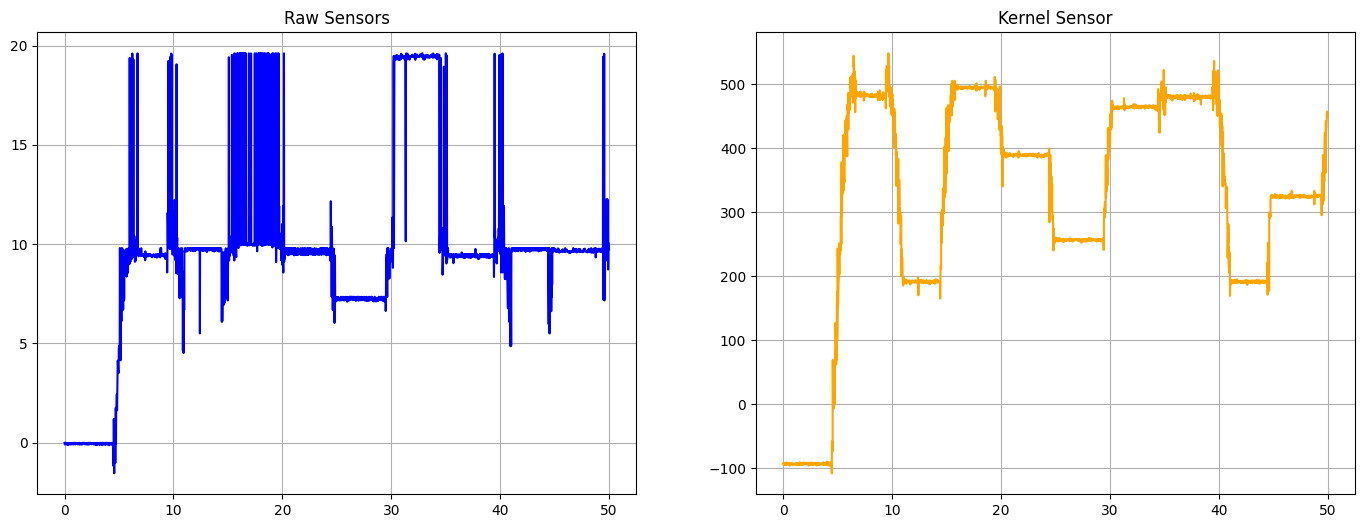

In [102]:
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
plt.plot(device.time, sensorData, color='blue')
plt.title('Raw Sensors')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(kernel.time, kernelData, color='orange')
plt.title('Kernel Sensor')
plt.grid()

- Comparação normalizada com erro relacionado à distancia entre os pontos

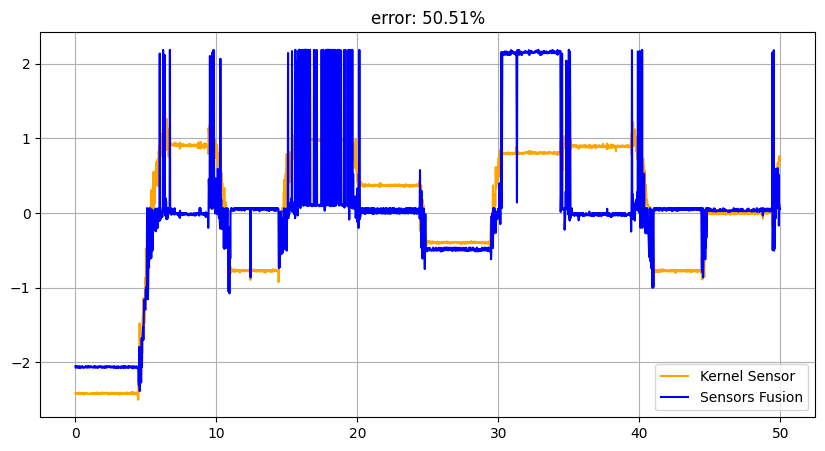

In [103]:
def normalize(data):
    return np.array(data - np.mean(data))/np.std(data)

def compare(data1, data2):
    data1 = normalize(data1)
    data2 = normalize(data2)
    score = wasserstein_distance(data1, data2)
    return data1, data2, score


k, s, score = compare(kernelData, sensorData)
plt.figure(figsize=(10, 5))
plt.plot(kernel.time, k, color='orange', label='Kernel Sensor')
plt.plot(device.time, s, color='blue',  label='Sensors Fusion')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()

# ALGORITMO DE FUSÃO
    ### FUSÃO POR KALMAN

| Parâmetro | Tipo / Unidade          | Intuição prática (“tradução”)                                  | Como ajustar / escolher                                          |
|-----------|-------------------------|----------------------------------------------------------------|------------------------------------------------------------------|
| x0        | Escalar (mesma unidade) | Palpite inicial do valor real                                  | Use a 1ª leitura do sensor mais confiável ou um valor médio      |
| P0        | Escalar ≥ 0 (unidade²)  | Variância inicial → quão incerto você está sobre x0            | Grande ⇒ confia pouco no palpite; Pequeno ⇒ confia muito         |
| Q         | Escalar ≥ 0 (unidade²)  | Ruído do modelo → permite que o estado mude entre amostras      | Aumente para reagir mais rápido; diminua para suavizar           |
| R         | Matriz 3 × 3 (diag)     | Ruído de medição de cada sensor (σ² na diagonal)                | Coloque σ² de cada sensor; maior σ² ⇒ peso menor na fusão        |

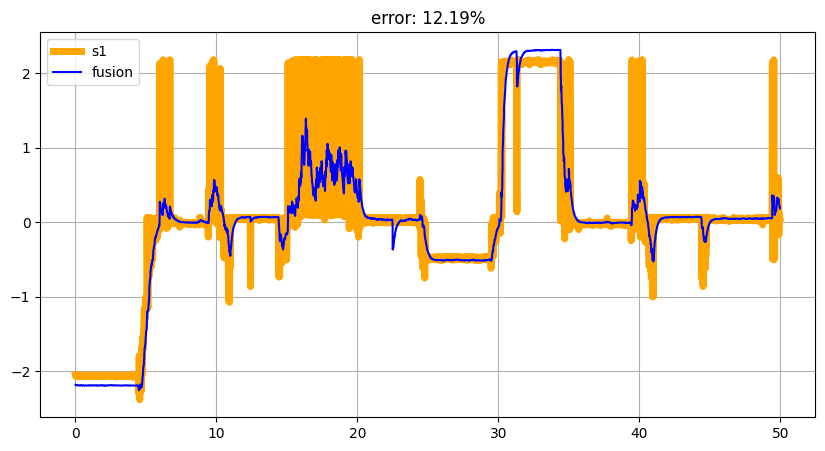

In [104]:
class KalmanFusion:
    def __init__(self, x0=0.0, P0=1e3, Q=1e-2, R=(1.0,)):
        self.x = float(x0)
        self.P = float(P0)
        self.Q = float(Q)

        if isinstance(R, (int, float)):
            self.R = (float(R), )
        else:
            self.R = tuple(float(r) for r in R)

    def predict(self):
        self.P += self.Q

    def update(self, z):
        self.predict()

        if isinstance(z, (int, float)):
            z = (float(z), )
        else:
            z = tuple(float(zi) for zi in z)

        for zi, Ri in zip(z, self.R):
            S = self.P + Ri        # variância da inovação
            K = self.P / S         # ganho de Kalman (escalar)
            y = zi - self.x        # inovação
            self.x += K * y
            self.P = (1.0 - K) * self.P

        return self.x, self.P


kalman = KalmanFusion(x0=0, P0=3.5, Q=0.01, R=(4.0, 3.5))
yModel = []

for i, row in device.iterrows():
    v1 = row.s1[key]
    v2 = row.s2[key]
    v, f = kalman.update((v1, v2))
    yModel.append(v)


k, s, score = compare(sensorData, yModel)
plt.figure(figsize=(10, 5))
plt.plot(kernel.time, k, color='orange', label=sensor, linewidth=5)
plt.plot(device.time, s, color='blue',  label='fusion')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()

# COMPARANDO DADOS

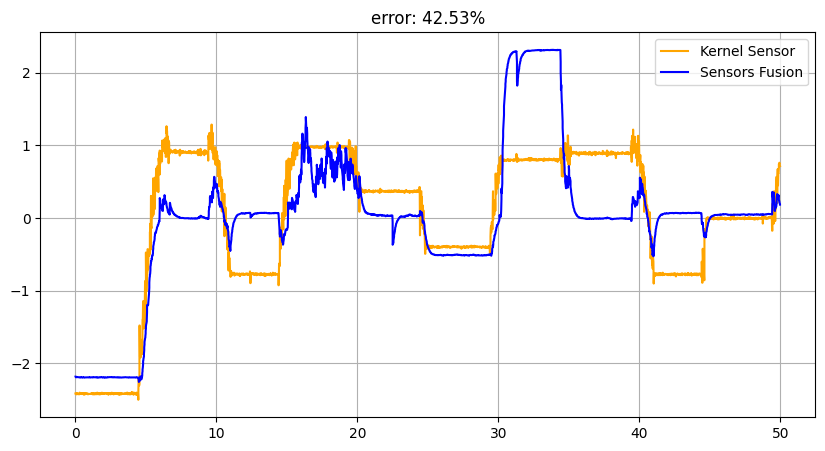

In [105]:
k, s, score = compare(kernelData, yModel)
plt.figure(figsize=(10, 5))
plt.plot(kernel.time, k, color='orange', label='Kernel Sensor')
plt.plot(device.time, s, color='blue',  label='Sensors Fusion')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()